# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 5/5/23
* Student Name: Thomas Flynn
* Student Net ID: ccm4dz
* GitHub Repo URL: https://github.com/Flynn-stagram/MonteCarlo.git

# The Monte Carlo Module

In [ ]:
class Die():
    """A die has N sides, or “faces”, and W weights, and can be rolled to select
    a face. W defaults to 1.0 for each face but can be changed after the object is created.
    Note that the weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Note that what we are calling a “die” here can be any discrete random variable associated with a stochastic process, such as using a deck of cards or flipping a coin or speaking a language. Our probability model for such variable is, however, very simple. since our weights apply to only to single events, we are assuming that the events are independent. This makes sense for coin tosses but not for language use"""
    def __init__(self, faces):
        """Takes an array of faces as an argument. The array's data type (type) may be strings or numbers.
        Internally initializes the weights to 1.0 for each face.
        Saves both faces and weights into a private dataframe that is to be shared by the other methods."""
        self.faces = faces
        self.__thedie = pd.DataFrame({'face': faces, 'weight': [1.0]*len(faces)})
    
    def change_weight(self, face, new_weight):
        """A method to change the weight of a single side.
        • Takes two arguments: the face value to be changed
        and the new weight.
        • Checks to see if the face passed is valid; is it in the
        array of weights?
        • Checks to see if the weight is valid; is it a float? Can it
        be converted to one?"""
        if face in self.__thedie['face'].values:
            try:
                new_weight_float = float(new_weight)
                self.__thedie.loc[self.__thedie['face'] == face, 'weight'] = new_weight_float
                print(f"The weight of face {face} has been changed to {new_weight_float}")
            except ValueError:
                print("Error: The new weight isn't a float")
        else:
            print("Error: The face value you passed couldn't be found")
        
    def roll_die(self, times=1):
        """A method to roll the die one or more times.
        • Takes a parameter of how many times the die is to be
        rolled; defaults to 1.
        • This is essentially a random sample from the vector of
        faces according to the weights.
        •  Returns a list of outcomes.
        •  Does not store internally these results."""
        outcomes = []
        for i in range(times):
            outcome = random.choices(self.__thedie['face'], weights=self.__thedie['weight'], k=1)[0] # type: ignore
            outcomes.append(outcome)
        return outcomes
            
    def __str__(self):
        """A method to show the user the die's current set of faces and
        weights (since the latter can be changed).
        • Returns the dataframe created in the initializer."""
        return str(self.__thedie)



class Game():
    """A game consists of rolling of one or more dice of the same kind one or
    more times.
    • Each game is initialized with one or more of similarly defined
    dice (Die objects).
    • By "same kind" and "similarly defined" we mean that each die
    in a given game has the same number of sides and associated
    faces, but each die object may have its own weights.
    • The class has a behavior to play a game, i.e. to rolls all of the
    dice a given number of times.
    • The class keeps the results of its most recent play."""
    def __init__(self, dice):
        """An initializer takes a single parameter, a list of already instantiated similar Die objects."""
        self.dice = dice
        self.__theresults = pd.DataFrame()
        
    def play(self, howmanyrolls):
        """A play method
        • Takes a parameter to specify how many times the
        dice should be rolled.
        • Saves the result of the play to a private dataframe of
        shape N rolls by M dice.
        • The private dataframe should have the roll number is
        a named index.
        •  This results in a table of data with columns for roll
        number, the die number (its list index), and the face
        rolled in that instance."""
        results = []
        for i in range(howmanyrolls):
            roll = [die.roll_die() for die in self.dice]
            results.append(roll)
        self.__theresults = pd.DataFrame(results, index=range(howmanyrolls), columns=["Die " + str(i+1) for i in range(len(self.dice))])
        self.__theresults.index.name = "Roll Number"
        
    def show_results(self, form='wide'):
        """A method to show the user the results of the most recent play.
        • This method just passes the private dataframe to the user.
        • Takes a parameter to return the dataframe in narrow or wide form.
        • This parameter defaults to wide form.
        • This parameter should raise an exception if the user passes an invalid option.
        • The narrow form of the dataframe will have a two-column index with the roll number and the die number, and a column for the face rolled.
        • The wide form of the dataframe will a single column index with the roll number, and each die number as a column."""
        if form == 'wide':
            return self.__theresults
        elif form == 'narrow':
            return pd.melt(self.__theresults.reset_index(), id_vars="Roll Number", var_name="Die", value_name="Face")
        else:
            raise ValueError("You need to specify either wide or narrow")



class Analyzer():
    """An analyzer takes the results of a single game and computes various descriptive statistical properties about it. These properties results are available as attributes of an Analyzer object. Attributes (and associated methods) include:"""
    def __init__(self, game):
        """An initializer
        •  Takes a game object as its input parameter.
        • At initialization time, it also infers the data type of the die faces used."""
        self.game = game
        
        # Infer data type of die faces
        sample_roll = game.show_results().iloc[0]
        self.dtype = type(sample_roll[0])
        
        self.jackpot_results = pd.DataFrame()
        self.combo_results = pd.DataFrame()
        self.facecount_results = pd.DataFrame()
        
    def jackpot(self):
        """A jackpot method to compute how many times the game resulted in all faces being identical.
        • Returns an integer for the number times to the user.
        •  Stores the results as a dataframe of jackpot results in a public attribute.
        • The dataframe should have the roll number as a named index."""
        jackpot_count = len(self.jackpot_results)
        if jackpot_count == 0:
            # Compute jackpot results
            identical_rolls = self.game.show_results().eq(self.game.show_results().iloc[:, 0], axis=0).all(axis=1)
            self.jackpot_results = pd.DataFrame({'jackpot': identical_rolls})
            self.jackpot_results.index.name = 'Roll Number'
            jackpot_count = identical_rolls.sum()
        return jackpot_count
        
    def combo(self):
        """A combo method to compute the distinct combinations of faces rolled, along with their counts.
        • Combinations should be sorted and saved as a multi-columned index.
        •  Stores the results as a dataframe in a public attribute."""
        if self.combo_results.empty:
            # Compute combo results
            combos = self.game.show_results().apply(lambda row: tuple(sorted(row)), axis=1).value_counts().reset_index()
            combos.columns = ['combo', 'count']
            self.combo_results = combos.set_index('combo').sort_index()
        return self.combo_results
    
    def face_count(self):
        """A face counts per roll method to compute how many times a given face is rolled in each event.
        •  Stores the results as a dataframe in a public attribute.
        • The dataframe has an index of the roll number and face values as columns (i.e. it is in wide format)."""
        face_counts = self.__theresults.melt(var_name='Die', value_name='Face').groupby(['Roll Number', 'Face']).size().unstack(fill_value=0) # type: ignore
        return face_counts

# Test Module

In [ ]:
import unittest
from unittest.mock import patch, MagicMock
from io import StringIO
import pandas as pd
import numpy as np

from montecarlo import Die

class TestDie(unittest.TestCase):
    
    def test_init(self):
        faces = [1, 2, 3, 4]
        die = Die(faces)
        self.assertTrue(isinstance(die, Die))
        self.assertTrue(isinstance(die._Die__thedie, pd.DataFrame))
        self.assertListEqual(die._Die__thedie['face'].tolist(), faces)
        self.assertListEqual(die._Die__thedie['weight'].tolist(), [1.0]*len(faces))
        
    def test_change_weight(self):
        faces = [1, 2, 3, 4]
        die = Die(faces)
        
        # Test changing weight of existing face
        die.change_weight(1, 2.0)
        self.assertAlmostEqual(die._Die__thedie.loc[die._Die__thedie['face'] == 1, 'weight'].values[0], 2.0)
        
        # Test changing weight of non-existing face
        with patch('sys.stdout', new=StringIO()) as fake_output:
            die.change_weight(5, 2.0)
            self.assertEqual(fake_output.getvalue().strip(), "Error: The face value you passed couldn't be found")
        
        # Test changing weight to non-float value
        with patch('sys.stdout', new=StringIO()) as fake_output:
            die.change_weight(1, 'string')
            self.assertEqual(fake_output.getvalue().strip(), "Error: The new weight isn't a float")
            
    def test_roll_die(self):
        faces = [1, 2, 3, 4]
        die = Die(faces)
        
        # Test rolling die
        outcomes = die.roll_die()
        self.assertTrue(isinstance(outcomes, list))
        self.assertIn(outcomes[0], faces)
        self.assertEqual(len(outcomes), 1)
        
        # Test rolling die multiple times
        outcomes = die.roll_die(times=10)
        self.assertEqual(len(outcomes), 10)
        self.assertTrue(all(outcome in faces for outcome in outcomes))
        
    def test_str(self):
        faces = [1, 2, 3, 4]
        die = Die(faces)
        die_str = str(die)
        self.assertIsInstance(die_str, str)
        self.assertEqual(die_str, str(die._Die__thedie))
        
        
if __name__ == '__main__':
    unittest.main(verbosity=2)
    
    
import unittest
import pandas as pd
from montecarlo import Die, Game

class TestGame(unittest.TestCase):
    
    def setUp(self):
        self.dice = [Die([1, 2, 3, 4, 5, 6])]
        self.game = Game(self.dice)
        
    def test_play(self):
        self.game.play(10)
        results = self.game.show_results()
        self.assertIsInstance(results, pd.DataFrame)
        self.assertEqual(len(results), 10)
        self.assertEqual(len(results.columns), 1)
        self.assertEqual(results.index.name, "Roll Number")
        self.assertEqual(results.columns[0], "Die 1")
        
    def test_show_results_wide(self):
        self.game.play(5)
        results = self.game.show_results(form='wide')
        self.assertIsInstance(results, pd.DataFrame)
        self.assertEqual(len(results), 5)
        self.assertEqual(len(results.columns), 1)
        self.assertEqual(results.index.name, "Roll Number")
        self.assertEqual(results.columns[0], "Die 1")
        
    def test_show_results_narrow(self):
        self.game.play(5)
        results = self.game.show_results(form='narrow')
        self.assertIsInstance(results, pd.DataFrame)
        self.assertEqual(len(results), 5)
        self.assertEqual(len(results.columns), 3)
        self.assertEqual(results.columns[0], "Roll Number")
        self.assertEqual(results.columns[1], "Die")
        self.assertEqual(results.columns[2], "Face")
        
if __name__ == '__main__':
    unittest.main()

import unittest
import pandas as pd
from montecarlo import Die, Game, Analyzer

class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        dice = [Die([1,2,3,4,5,6]), Die([1,2,3,4,5,6])]
        self.game = Game(dice)
        self.analyzer = Analyzer(self.game)

    def test_jackpot(self):
        self.assertEqual(self.analyzer.jackpot(), 0)
        self.game.play()
        self.assertEqual(self.analyzer.jackpot(), 1)

    def test_combo(self):
        self.assertTrue(self.analyzer.combo().empty)
        self.game.play()
        self.assertFalse(self.analyzer.combo().empty)

    def test_face_count(self):
        face_counts = self.analyzer.face_count()
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertEqual(face_counts.index.name, 'Roll Number')
        self.assertListEqual(face_counts.columns.tolist(), [1, 2, 3, 4, 5, 6])
        self.assertTrue((face_counts.sum(axis=1) == 2).all())
if __name__ == '__main__':
    unittest.main()

# Test Results

die_tests

test_change_weight (__main__.TestDie) ... ok
test_init (__main__.TestDie) ... ok
test_roll_die (__main__.TestDie) ... ok
test_str (__main__.TestDie) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [2]:
import pandas as pd
import numpy as np

from montecarlo import Die

In [3]:
faces = ['H', 'T']

In [4]:
fair_coin = Die(faces)

In [5]:
unfair_coin = Die(faces)
unfair_coin.change_weight('H', 5)

The weight of face H has been changed to 5.0


In [8]:
from montecarlo import Game

In [9]:
coin_one = fair_coin
coin_two = fair_coin
coin_three = fair_coin
dice = [coin_one, coin_two, coin_three]
just_fairgame = Game(dice)
just_fairgame.play(1000)
just_fairgame.show_results()

,Die 1,Die 2,Die 3
Roll Number,,,
0,[H],[T],[T]
1,[H],[H],[H]
2,[H],[H],[H]
3,[T],[H],[T]
4,[T],[T],[T]
...,...,...,...
995,[T],[H],[H]
996,[H],[H],[T]
997,[H],[T],[H]


In [10]:
coin_one = fair_coin
coin_two = unfair_coin
coin_three = unfair_coin
dicesettwo = [coin_one, coin_two, coin_three]
twoversusone = Game(dicesettwo)
twoversusone.play(1000)
twoversusone.show_results()

,Die 1,Die 2,Die 3
Roll Number,,,
0,[H],[H],[H]
1,[T],[H],[H]
2,[H],[H],[T]
3,[T],[H],[H]
4,[H],[H],[H]
...,...,...,...
995,[T],[H],[H]
996,[T],[H],[H]
997,[H],[H],[H]


In [11]:
from montecarlo import Analyzer

In [12]:
analyze_this = Analyzer(just_fairgame)

In [13]:
thiswins = analyze_this.jackpot()

In [14]:
print (thiswins)

243


In [16]:
rolls_this = len(analyze_this.game.show_results())
print(rolls_this)

1000


In [17]:
jackpots_freq_this = thiswins / rolls_this
print (jackpots_freq_this)

0.243


In [18]:
analyze_this.combo()

,count
combo,
"([H], [H], [H])",113
"([H], [H], [T])",390
"([H], [T], [T])",367
"([T], [T], [T])",130


In [19]:
analyze_that = Analyzer(twoversusone)

In [20]:
thatwins = analyze_that.jackpot()

In [21]:
print(thatwins)

376


In [22]:
rolls_that = len(analyze_that.game.show_results())
print(rolls_that)

1000


In [23]:
jackpots_freq_that = thatwins / rolls_that
print (jackpots_freq_that)

0.376


In [24]:
analyze_that.combo()

,count
combo,
"([H], [H], [H])",365
"([H], [H], [T])",483
"([H], [T], [T])",141
"([T], [T], [T])",11


In [25]:
import plotly.graph_objs as go

In [26]:
data = [go.Bar(x=['Three Fair Dice', 'One Fair Two Loaded'], y=[jackpots_freq_this, jackpots_freq_that])]

layout = go.Layout(title='Relative Frequency of Jackpots', yaxis=dict(title='Relative Frequency'))

fig = go.Figure(data=data, layout=layout)

fig.show()

## Scenario 2

In [27]:
from montecarlo import Die

In [28]:
faces = [1,2,3,4,5,6]

In [29]:
fair_die = Die(faces)

In [30]:
type1 = Die(faces)
type1.change_weight(6, 5)

The weight of face 6 has been changed to 5.0


In [31]:
type2 = Die(faces)
type2.change_weight(1, 5)

The weight of face 1 has been changed to 5.0


In [32]:
fivefair = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fivefair.play(10000)
fivefair.show_results()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
0,[1],[4],[6],[2],[3]
1,[2],[1],[1],[6],[3]
2,[4],[3],[3],[4],[3]
3,[3],[2],[1],[4],[1]
4,[6],[4],[6],[1],[2]
...,...,...,...,...,...
9995,[4],[1],[4],[4],[6]
9996,[1],[6],[4],[6],[1]
9997,[2],[6],[1],[6],[5]


In [33]:
twoone_onetwo_twofair = Game([type1, type1, type2, fair_die, fair_die])
twoone_onetwo_twofair.play(10000)
twoone_onetwo_twofair.show_results()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
0,[6],[6],[1],[5],[3]
1,[6],[6],[1],[5],[5]
2,[6],[2],[1],[3],[4]
3,[6],[2],[6],[2],[2]
4,[6],[6],[1],[5],[6]
...,...,...,...,...,...
9995,[3],[6],[5],[1],[4]
9996,[6],[6],[5],[5],[4]
9997,[2],[6],[2],[2],[1]


In [34]:
fairandsquare = Analyzer(fivefair)
honest = fairandsquare.jackpot()
rolls_fairandsquare = len(fairandsquare.game.show_results())
fands_freq = honest/rolls_fairandsquare

In [35]:
cheated = Analyzer(twoone_onetwo_twofair)
shady = cheated.jackpot()
rolls_cheated = len(cheated.game.show_results())
cheat_freq = shady/rolls_cheated

In [36]:
data = [go.Bar(x=['Five Fair Dice', 'Two Six-Heavy + One One-Heavy + Two Fair'], y=[fands_freq, cheat_freq])]

layout = go.Layout(title='Relative Frequency of Jackpots', yaxis=dict(title='Relative Frequency'))

fig = go.Figure(data=data, layout=layout)

fig.show()

In [37]:
import plotly.express as px

In [38]:
faircombos = fairandsquare.combo()

In [39]:
faircombossorted = faircombos.sort_values(by=['count'], ascending=False)
fairtop10 = faircombossorted.head(10)
fairtop10

,count
combo,
"([1], [3], [4], [5], [6])",172
"([1], [2], [3], [4], [6])",162
"([2], [3], [4], [5], [6])",156
"([1], [2], [4], [5], [6])",153
"([1], [2], [3], [4], [5])",141
"([1], [2], [3], [5], [6])",141
"([1], [2], [3], [4], [4])",97
"([2], [3], [3], [4], [5])",95
"([3], [3], [4], [5], [6])",93


<AxesSubplot:xlabel='combo'>

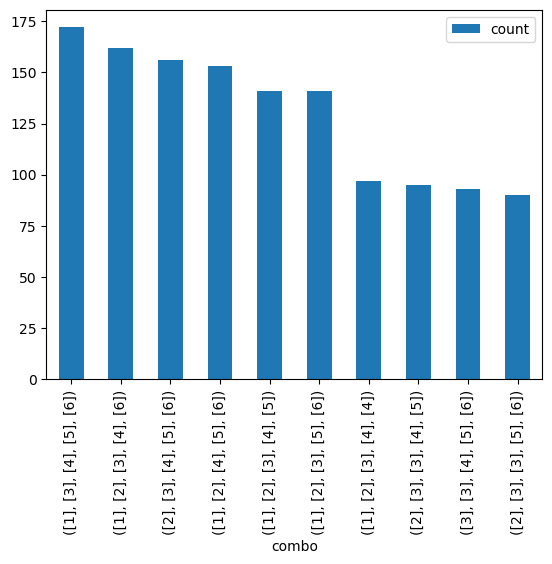

In [40]:
fairtop10.plot.bar()

In [41]:
cheatcombos = cheated.combo()

In [42]:
cheatcombossorted = cheatcombos.sort_values(by=['count'], ascending=False)
cheattop10 = cheatcombossorted.head(10)
cheattop10

,count
combo,
"([1], [2], [3], [6], [6])",230
"([1], [3], [4], [6], [6])",216
"([1], [2], [4], [6], [6])",211
"([1], [3], [5], [6], [6])",197
"([1], [2], [5], [6], [6])",191
"([1], [2], [3], [4], [6])",190
"([1], [3], [4], [5], [6])",188
"([1], [2], [3], [5], [6])",174
"([1], [4], [5], [6], [6])",174


<AxesSubplot:xlabel='combo'>

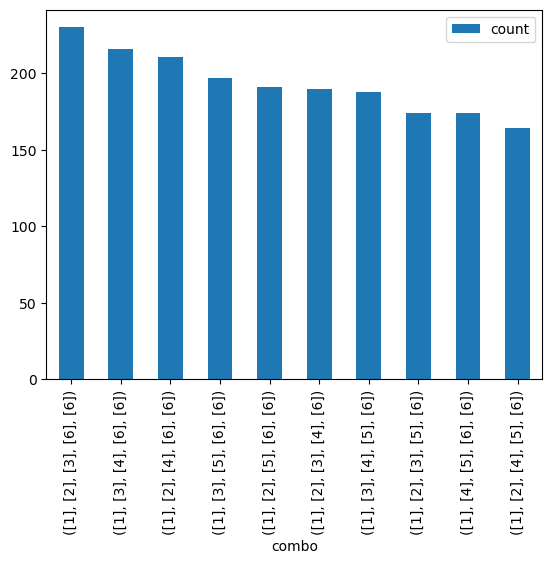

In [43]:
cheattop10.plot.bar()

## Scenario 3

In [44]:
dice_weights = {'A': 8.4966, 'B': 2.0720, 'C': 4.5388, 'D': 3.3844, 'E': 11.1607, 'F': 1.8121, 'G': 2.4705, 
                'H': 3.0034, 'I': 7.5448, 'J': 0.1965, 'K': 1.1016, 'L': 5.4893, 'M': 3.0129, 'N': 6.6544, 
                'O': 7.1635, 'P': 3.1671, 'Q': 0.1962, 'R': 7.5809, 'S': 5.7351, 'T': 6.9509, 'U': 3.6308, 
                'V': 1.0074, 'W': 1.2899, 'X': 0.2902, 'Y': 1.7779, 'Z': 0.2722}

alfabeta = Die(faces=list(dice_weights.keys()))

for face, weight in dice_weights.items():
    alfabeta.change_weight(face, weight)

The weight of face A has been changed to 8.4966
The weight of face B has been changed to 2.072
The weight of face C has been changed to 4.5388
The weight of face D has been changed to 3.3844
The weight of face E has been changed to 11.1607
The weight of face F has been changed to 1.8121
The weight of face G has been changed to 2.4705
The weight of face H has been changed to 3.0034
The weight of face I has been changed to 7.5448
The weight of face J has been changed to 0.1965
The weight of face K has been changed to 1.1016
The weight of face L has been changed to 5.4893
The weight of face M has been changed to 3.0129
The weight of face N has been changed to 6.6544
The weight of face O has been changed to 7.1635
The weight of face P has been changed to 3.1671
The weight of face Q has been changed to 0.1962
The weight of face R has been changed to 7.5809
The weight of face S has been changed to 5.7351
The weight of face T has been changed to 6.9509
The weight of face U has been changed to

In [45]:
wordplay = Game([alfabeta, alfabeta, alfabeta, alfabeta, alfabeta])
wordplay.play(1000)
palabras = wordplay.show_results()

Surprisingly few looked like English words - it wasn't until number 134 that I found a recognizable word, and even then it was a proper noun "Fagan" (a surname) that comes from Gaeilge (Irish, in Celtic ☘️ language family). Need a larger sample, but I'd say roughly 1:134

In [46]:
1 / 134

0.007462686567164179

Proportion is therefore approx 0.007

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [47]:
!ls -lRF -o

total 1968
drwxr-xr-x  17 tommy     544 May  5 23:41 Detritus/
-rw-r--r--@  1 tommy  135915 May  5 23:53 FinalProjectSubmissionTemplate.ipynb
-rw-------@  1 tommy  740625 May  5 23:56 FlynnFinalProjectSubmissionTemplate.html
drwxr-xr-x   7 tommy     224 May  5 23:39 Project_Global/
-rw-r--r--@  1 tommy    6784 May  5 23:47 README.md
-rw-r--r--@  1 tommy  118774 May  5 23:13 montecarlo_demo.ipynb

./Detritus:
total 368
-rw-r--r--@  1 tommy  37632 May  5 16:30 FinalProjectInstructions.pdf
-rw-r--r--@  1 tommy  17547 May  5 23:20 README.html
drwxr-xr-x@  4 tommy    128 May  5 23:25 README_files/
-rw-r--r--   1 tommy  11895 May  5 21:08 Untitled.ipynb
-rw-r--r--@  1 tommy  74316 May  5 22:28 Untitled1.ipynb
drwxr-xr-x@ 11 tommy    352 May  5 22:56 __pycache__/
-rw-r--r--@  1 tommy   3315 May  5 22:44 analyzer-results.txt
-rw-r--r--@  1 tommy    980 May  5 22:41 analyzer_tests.py
-rw-r--r--@  1 tommy    254 May  5 22:01 die-results.txt
-rw-r--r--@  1 tommy   2182 May  5 22:00 die_tests.py
-

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [1]:
pip install montecarlo

  Preparing metadata (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1.17-py3-none-any.whl size=1857 sha256=e4052ae7f0218bf71422d7648cf94513895c47c43f9dfed463bac417c21875a6
  Stored in directory: /Users/tommy/Library/Caches/pip/wheels/ea/60/c6/9de9b2f21cd9b2fcf3fef492ffb56de76b3bb1dc79dc508ac6
Successfully built montecarlo
Note: you may need to restart the kernel to use updated packages.
